In [1]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Processed Data/Datasets After Feature Extraction.csv", dtype={1: str}) #Reading in the CSV file into a Dataframe

In [3]:
df.shape

(983820, 14)

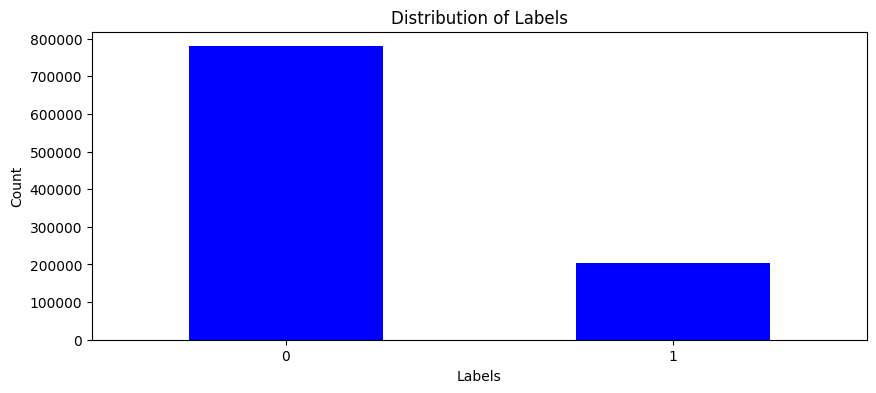

In [4]:
label_counts = df['Label'].value_counts()

plt.figure(figsize=(10, 4))
label_counts.plot(kind='bar', color='blue')
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983820 entries, 0 to 983819
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   URL                      983820 non-null  object
 1   Domain                   521835 non-null  object
 2   IP_Address               983820 non-null  int64 
 3   Prefix/Suffix_in_Domain  983820 non-null  int64 
 4   Tiny_URL                 983820 non-null  int64 
 5   @_Symbol                 983820 non-null  int64 
 6   URL_Length               983820 non-null  int64 
 7   Http/https_in_Domain     983820 non-null  int64 
 8   Depth_Of_URL             983820 non-null  int64 
 9   Redirection              983820 non-null  int64 
 10  Num_of_Dots              983820 non-null  int64 
 11  Num_of_Hyphens           983820 non-null  int64 
 12  Num_of_Underscore        983820 non-null  int64 
 13  Label                    983820 non-null  int64 
dtypes: int64(12), object

In [6]:
df.describe()

,IP_Address,Prefix/Suffix_in_Domain,Tiny_URL,@_Symbol,URL_Length,Http/https_in_Domain,Depth_Of_URL,Redirection,Num_of_Dots,Num_of_Hyphens,Num_of_Underscore,Label
count,983820.000000,983820.000000,983820.000000,983820.000000,983820.000000,983820.000000,983820.000000,983820.000000,983820.000000,983820.000000,983820.000000,983820.000000
mean,0.004992,0.037221,0.002734,0.004576,0.418417,0.000211,2.595566,0.003880,2.309159,1.429607,0.416601,0.207623
std,0.070476,0.189304,0.052218,0.067492,0.493300,0.014539,1.661467,0.062167,1.408319,2.859578,1.293175,0.405606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,3.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,38.000000,1.000000,42.000000,87.000000,200.000000,1.000000


In [7]:
df1 = df.drop(['Domain'], axis = 1).copy()

In [8]:
df1.isna().sum() #Checking if any NaN values exist in any of the columns of df1

URL                        0
IP_Address                 0
Prefix/Suffix_in_Domain    0
Tiny_URL                   0
@_Symbol                   0
URL_Length                 0
Http/https_in_Domain       0
Depth_Of_URL               0
Redirection                0
Num_of_Dots                0
Num_of_Hyphens             0
Num_of_Underscore          0
Label                      0
dtype: int64

In [9]:
df1.isnull().sum() #Checking if any null values exist in any of the columns of df1

URL                        0
IP_Address                 0
Prefix/Suffix_in_Domain    0
Tiny_URL                   0
@_Symbol                   0
URL_Length                 0
Http/https_in_Domain       0
Depth_Of_URL               0
Redirection                0
Num_of_Dots                0
Num_of_Hyphens             0
Num_of_Underscore          0
Label                      0
dtype: int64

In [10]:
df_shuffled = df1.sample(frac=1).reset_index(drop=True) #Shuffling the entries of df1

In [11]:
df_shuffled.head()

,URL,IP_Address,Prefix/Suffix_in_Domain,Tiny_URL,@_Symbol,URL_Length,Http/https_in_Domain,Depth_Of_URL,Redirection,Num_of_Dots,Num_of_Hyphens,Num_of_Underscore,Label
0,https://www.facebook.com/ParkHillSchoolDistrict,0,0,0,0,0,0,1,0,2,0,0,0
1,http://35wtc9gafy.naqycirefujppa.info/sq3pcgah...,0,0,0,0,1,0,3,0,4,0,0,1
2,bjcurio.com/js/index.htm?us.battle.net/login/e...,0,0,0,0,1,0,3,0,6,1,0,0
3,https://www.blog.smalleycreative.com/,0,0,0,0,0,0,0,0,3,0,0,0
4,https://www.sacbee.com/2010/12/31/3287828/paul...,0,0,0,0,1,0,5,0,3,4,0,0


In [12]:
y = df_shuffled['Label']
X = df_shuffled.drop(['URL', 'Label'], axis = 1)

In [13]:
# Trainsing set: 70%
# Validating set: 15%
# Testing set: 15%


X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    stratify=y,  #Due to the huge imbalance of the two classes(phishing = 1, benign = 0), the ratio of splititng between the classes are maintained
    random_state=10
)


In [14]:
X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test, 
    test_size=0.5, 
    stratify=y_test, #Due to the huge imbalance of the two classes(phishing = 1, benign = 0), the ratio of splititng between the classes are maintained
    random_state=10
)

In [15]:
smote = SMOTE(random_state=10, sampling_strategy="all")
X_train, y_train = smote.fit_resample(X_train, y_train)

In [16]:
X_train.shape

(1091378, 11)

In [17]:
X_val.shape

(147573, 11)

In [18]:
X_test.shape

(147573, 11)

In [20]:
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)



In [21]:
X_train.to_csv("Training Dataset/X_train.csv")
X_val.to_csv("Validation Dataset/X_val.csv")
X_test.to_csv("Testing Dataset/X_test.csv")

y_train.to_csv("Training Dataset/y_train.csv")
y_val.to_csv("Validation Dataset/y_val.csv")
y_test.to_csv("Testing Dataset/y_test.csv")